# To analyse Interest Graph Networks on GitHub

Our goal is to analyse the stargazers of the popular repository 'Mining the social web' owned by Mathew A Russell, author of popular book called 'mining the social web'. This network analysis can be utilized to identify good developers and coders working in a domain, what are the languages they are coding in, what other interests they share in addition. We see it being implied by companies or startups who want to form cohesive teams working on a specific topic. 

In [1]:
from github import Github

In [2]:
# Specify your own access token here
ACCESS_TOKEN = '********************************************'

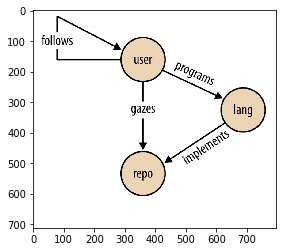

In [8]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import cv2 
img = cv2.imread('Idea.png')  
plt.imshow(img) 
# Output Images 
plt.imshow(img) 

# Level 1

In [3]:
# Specify a username and repository of interest for that user.

USER = 'ptwobrussell'
REPO = 'Mining-the-Social-Web'

client = Github(ACCESS_TOKEN, per_page=100)
user = client.get_user(USER)
repo = user.get_repo(REPO)

# Get a list of people who have bookmarked the repo.
# Since you'll get a lazy iterator back, you have to traverse
# it if you want to get the total number of stargazers.

stargazers = [ s for s in repo.get_stargazers() ]
print ("Number of stargazers", len(stargazers))

('Number of stargazers', 1176)


In [4]:
# Expand the initial graph with (interest) edges pointing each direction for 
# additional people interested. Take care to ensure that user and repo nodes 
# do not collide by appending their type.

import networkx as nx

g = nx.DiGraph()
g.add_node(repo.name + '(repo)', type='repo', lang=repo.language, owner=user.login)

for sg in stargazers:
    g.add_node(sg.login + '(user)', type='user')
    g.add_edge(sg.login + '(user)', repo.name + '(repo)', type='gazes')

## Ego graph

('Number of stargazers', 1177)


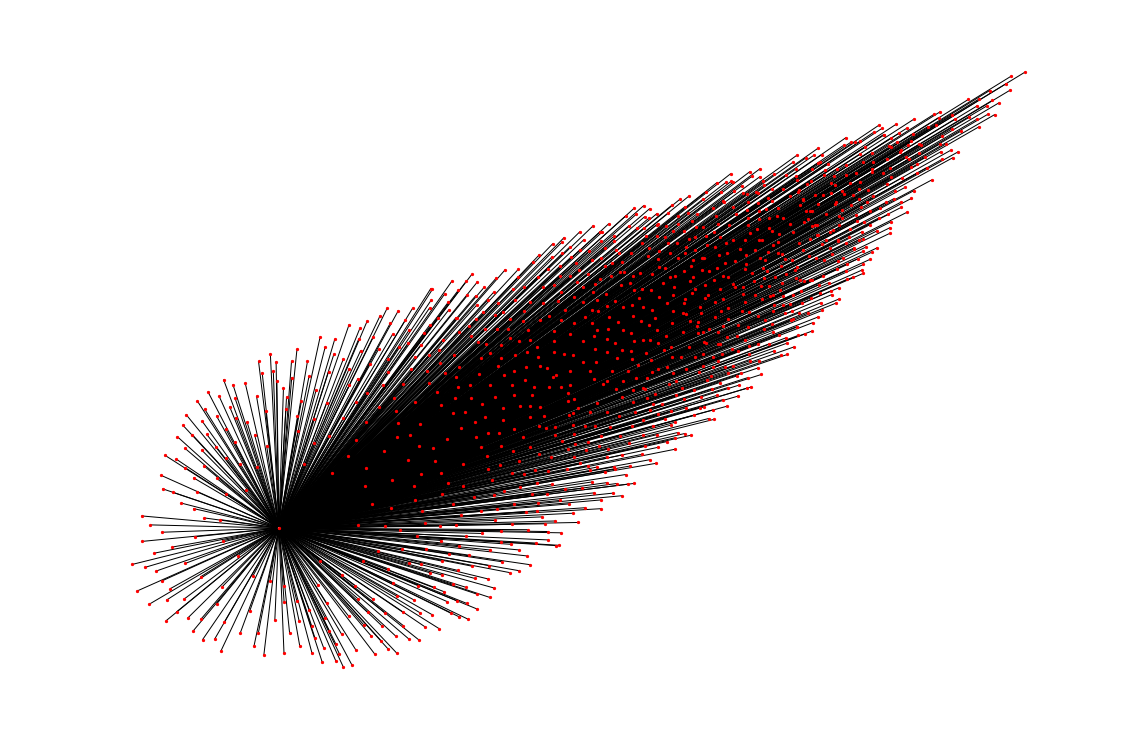

In [18]:
%matplotlib inline
print ("Number of stargazers", len(g1))
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
nx.draw(g1, with_labels=False, node_size=5)
plt.show()

('Number of stargazers', 1177)


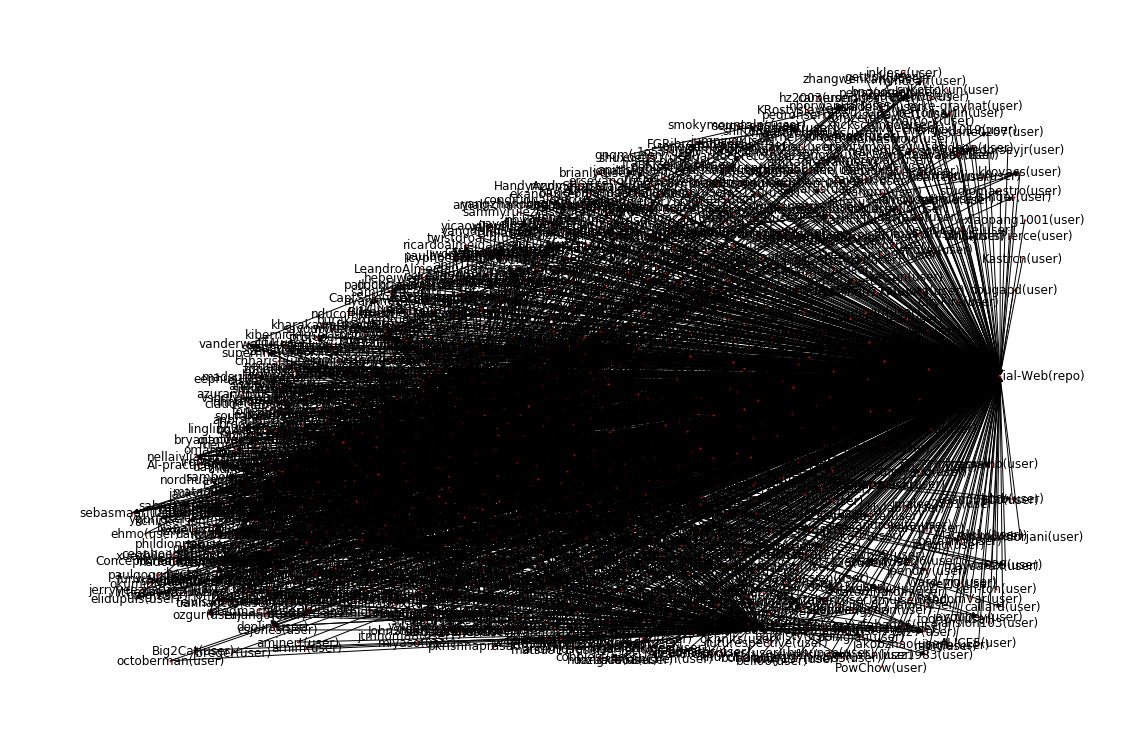

In [13]:
%matplotlib inline
print ("Number of stargazers", len(h))
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
nx.draw(h, with_labels=True, node_size=1)
plt.show()

In [17]:
#separate for graphical purpose
# Expand the initial graph with (interest) edges pointing each direction for 
# additional people interested. Take care to ensure that user and repo nodes 
# do not collide by appending their type.

import networkx as nx

g1 = nx.DiGraph()
g1.add_node(repo.name + '(repo)', type='repo', lang=repo.language, owner=user.login)

for sg in stargazers:
    g1.add_node(sg.login + '(user)', type='user')
    g1.add_edge(sg.login + '(user)', repo.name + '(repo)', type='gazes')

In [9]:
# Irrelevant

from operator import itemgetter
from IPython.display import HTML
from IPython.core.display import display

display(HTML('<img src="files/resources/ch07-github/kite-graph.png" width="400px">'))

# The classic Krackhardt kite graph
kkg = nx.generators.small.krackhardt_kite_graph()

print("Degree Centrality")
print(sorted(nx.degree_centrality(kkg).items(), 
             key=itemgetter(1), reverse=True))
print()

print("Betweenness Centrality")
print(sorted(nx.betweenness_centrality(kkg).items(), 
             key=itemgetter(1), reverse=True))
print()

print("Closeness Centrality")
print(sorted(nx.closeness_centrality(kkg).items(), 
             key=itemgetter(1), reverse=True))

Degree Centrality
[(3, 0.6666666666666666), (5, 0.5555555555555556), (6, 0.5555555555555556), (0, 0.4444444444444444), (1, 0.4444444444444444), (2, 0.3333333333333333), (4, 0.3333333333333333), (7, 0.3333333333333333), (8, 0.2222222222222222), (9, 0.1111111111111111)]

Betweenness Centrality
[(7, 0.38888888888888884), (5, 0.23148148148148148), (6, 0.23148148148148148), (8, 0.2222222222222222), (3, 0.10185185185185183), (0, 0.023148148148148143), (1, 0.023148148148148143), (2, 0.0), (4, 0.0), (9, 0.0)]

Closeness Centrality
[(5, 0.6428571428571429), (6, 0.6428571428571429), (3, 0.6), (7, 0.6), (0, 0.5294117647058824), (1, 0.5294117647058824), (2, 0.5), (4, 0.5), (8, 0.42857142857142855), (9, 0.3103448275862069)]


# Level 2

In [10]:
# Add (social) edges from the stargazers' followers. This can take a while 
# because of all of the potential API calls to GitHub. The approximate number
# of requests for followers for each iteration of this loop can be calculated as
# math.ceil(sg.get_followers() / 100.0) per the API returning up to 100 items
# at a time.

import sys

for i, sg in enumerate(stargazers):
    
    # Add "follows" edges between stargazers in the graph if any relationships exist
    try:
        for follower in sg.get_followers():
            if follower.login + '(user)' in g:
                g.add_edge(follower.login + '(user)', sg.login + '(user)', 
                           type='follows')
    except Exception: #ssl.SSLError
        print 'error'
        #print(sys.stderr, "Encountered an error fetching followers for", \
                             #sg.login, "Skipping.")
        #print(sys.stderr, Exception)

    #print("Processed", i+1, " stargazers. Num nodes/edges in graph", \
          #g.number_of_nodes(), "/", g.number_of_edges())
    #print("Rate limit remaining", client.rate_limiting)

1

In [11]:
h=g.copy()

In [12]:
print (nx.info(h))

Name: 
Type: DiGraph
Number of nodes: 1177
Number of edges: 2811
Average in degree:   2.3883
Average out degree:   2.3883


('Number of stargazers', 1177)


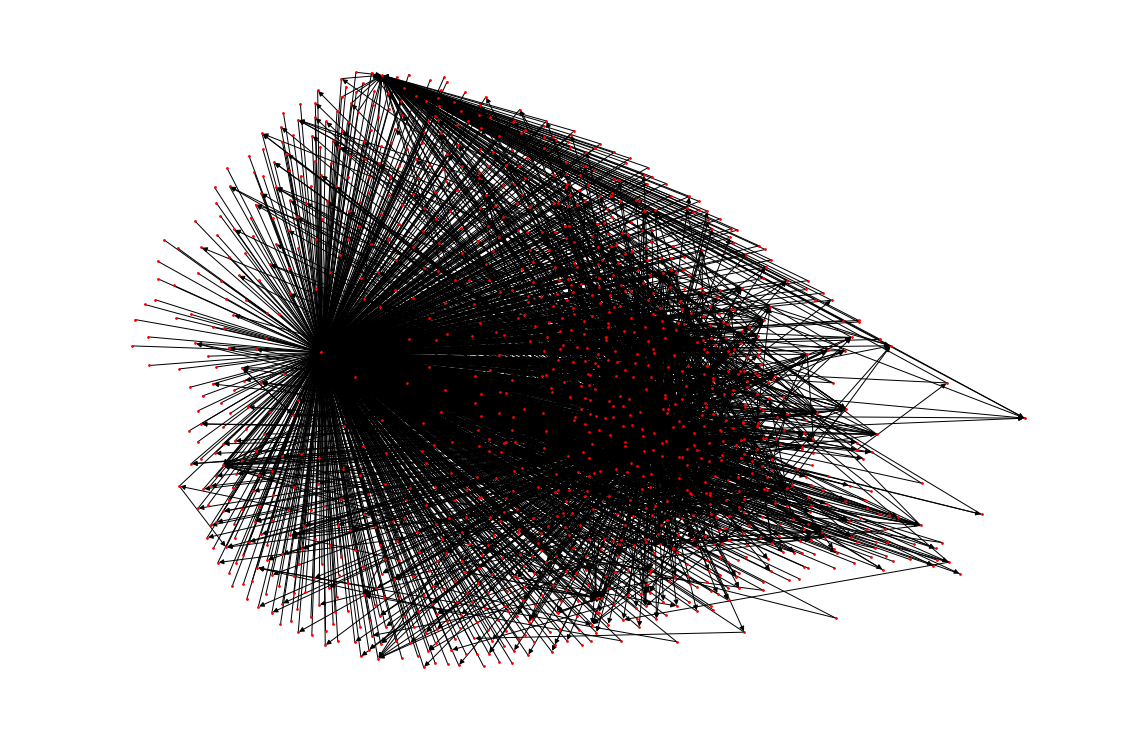

In [15]:
%matplotlib inline
print ("Number of stargazers", len(h))
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
nx.draw(h, with_labels=False, node_size=3)
plt.show()

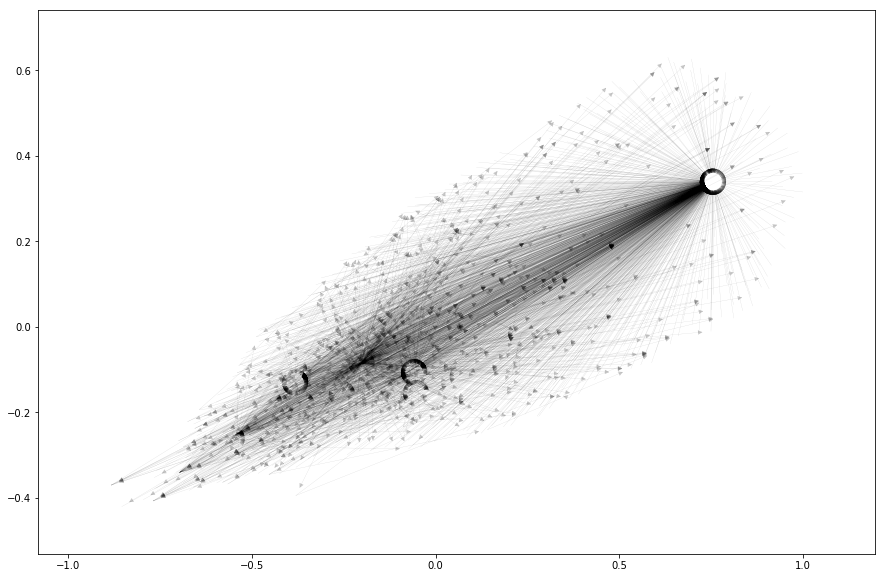

In [55]:
import numpy as np 
pos = nx.layout.spring_layout(h)
edgewidths = [0.2]
edgecolors = [0.01]
#nodesizes = np.array([1, .5, 2]) * 300
plt.figure(figsize=(15,10))
#
nx.draw_networkx_edges(h,pos, width=edgewidths,alpha=0.2,with_labels=True)
plt.show()

In [59]:
# The number of "follows" edges is the difference
print len([e for e in list(h.edges(data=True)) if e[2]['type'] == 'follows'])
print

1635



In [60]:
# The repository owner is possibly one of the more popular users in this graph.
print len([e 
           for e in list(h.edges(data=True))
               if e[2]['type'] == 'follows' and e[1] == 'ptwobrussell(user)'])
print

129



In [61]:
# Let's examine the number of adjacent edges to each node
print sorted([n for n in list(h.degree())], key=itemgetter(1), reverse=True)[:10]
print 

[(u'Mining-the-Social-Web(repo)', 1176), (u'angusshire(user)', 517), (u'kenneth-reitz(user)', 177), (u'ptwobrussell(user)', 130), (u'VagrantStory(user)', 107), (u'trietptm(user)', 71), (u'rohithadassanayake(user)', 67), (u'daimajia(user)', 43), (u'mcanthony(user)', 36), (u'JT5D(user)', 33)]



In [25]:
!pip3 install -U git+https://github.com/taynaud/python-louvain.git

  Cloning https://github.com/taynaud/python-louvain.git to c:\users\avani\appdata\local\temp\pip-req-build-g_0rnnr1
  Stored in directory: C:\Users\Avani\AppData\Local\Temp\pip-ephem-wheel-cache-7ay5kr43\wheels\03\1a\07\c8c6e7bb1e7ce55ab0159002ca255c9c2ca75e191533465bf3
Successfully built python-louvain
  Found existing installation: python-louvain 0.13
    Uninstalling python-louvain-0.13:
      Successfully uninstalled python-louvain-0.13


In [20]:
!pip3 install -U git+https://github.com/taynaud/python-louvain.git@networkx2
import networkx as nx


  Cloning https://github.com/taynaud/python-louvain.git (to revision networkx2) to c:\users\judge\appdata\local\temp\pip-req-build-vrqk746k


  Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/taynaud/python-louvain.git C:\Users\judge\AppData\Local\Temp\pip-req-build-vrqk746k
Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [34]:
# The number of "follows" edges is the difference
print(len([e for e in list(g.edges(data=True)) if e[2]['type'] == 'follows']))
print()

1635



In [22]:

# The repository owner is possibly one of the more popular users in this graph.
print(len([e 
           for e in list(h.edges(data=True)) 
               if e[2]['type'] == 'follows' and e[1] == 'ptwobrussell(user)']))
print()

# Let's examine the number of adjacent edges to each node
print(sorted([n for n in list(h.degree())], key=itemgetter(1), reverse=True)[:10])
print

# Consider the ratio of incoming and outgoing edges for a couple of users with 
# high node degrees...

# A user who follows many but is not followed back by many.

print(len(h.out_edges('hcilab(user)')))
print(len(h.in_edges('hcilab(user)')))
print()

# A user who is followed by many but does not follow back.

print(len(h.out_edges('ptwobrussell(user)')))
print(len(h.in_edges('ptwobrussell(user)')))
print()

c = Counter([e[1] for e in list(g.edges(data=True)) if e[2]['type'] == 'follows'])
popular_users = [ (u, f) for (u, f) in c.most_common() if f > 1 ]
print ("Number of popular users", len(popular_users))
print ("Top 10 popular users:", popular_users[:10])

129
()
[(u'Mining-the-Social-Web(repo)', 1176), (u'angusshire(user)', 517), (u'kenneth-reitz(user)', 177), (u'ptwobrussell(user)', 130), (u'VagrantStory(user)', 107), (u'trietptm(user)', 71), (u'rohithadassanayake(user)', 67), (u'daimajia(user)', 43), (u'mcanthony(user)', 36), (u'JT5D(user)', 33)]

0
0
()
1
129
()
('Number of popular users', 265)
('Top 10 popular users:', [(u'kenneth-reitz(user)', 174), (u'ptwobrussell(user)', 129), (u'daimajia(user)', 38), (u'angusshire(user)', 23), (u'hammer(user)', 22), (u'jakubroztocil(user)', 21), (u'isnowfy(user)', 18), (u'japerk(user)', 18), (u'dgryski(user)', 14), (u'ZoomQuiet(user)', 11)])


In [63]:
# Let's add each stargazer's additional starred repos and add edges 
# to find additional interests.

MAX_REPOS = 500

for i, sg in enumerate(stargazers):
    print(sg.login)
    try:
        for starred in sg.get_starred()[:MAX_REPOS]: # Slice to avoid supernodes
            h1.add_node(starred.name + '(repo)', type='repo', lang=starred.language, \
                       owner=starred.owner.login)
            h1.add_edge(sg.login + '(user)', starred.name + '(repo)', type='gazes')
    except Exception: #ssl.SSLError:
        print ("Encountered an error fetching starred repos for", sg.login, "Skipping.")

    print("Processed", i+1, "stargazers' starred repos")
    print("Num nodes/edges in graph", h1.number_of_nodes(), "/", h1.number_of_edges())
    print("Rate limit", client.rate_limiting)

rdempsey
('Processed', 1, "stargazers' starred repos")
('Num nodes/edges in graph', 1674, '/', 2133)
('Rate limit', (4995, 5000))
frac
('Processed', 2, "stargazers' starred repos")
('Num nodes/edges in graph', 1810, '/', 2273)
('Rate limit', (4993, 5000))
prb
('Processed', 3, "stargazers' starred repos")
('Num nodes/edges in graph', 1988, '/', 2458)
('Rate limit', (4991, 5000))
mcroydon
('Processed', 4, "stargazers' starred repos")
('Num nodes/edges in graph', 2476, '/', 2958)
('Rate limit', (4986, 5000))
batasrki
('Processed', 5, "stargazers' starred repos")
('Num nodes/edges in graph', 2529, '/', 3017)
('Rate limit', (4985, 5000))
twleung
('Processed', 6, "stargazers' starred repos")
('Num nodes/edges in graph', 2654, '/', 3150)
('Rate limit', (4983, 5000))
kevinchiu
('Processed', 7, "stargazers' starred repos")
('Num nodes/edges in graph', 3104, '/', 3644)
('Rate limit', (4978, 5000))
nikolay
('Processed', 8, "stargazers' starred repos")
('Num nodes/edges in graph', 3588, '/', 4143)

('Processed', 64, "stargazers' starred repos")
('Num nodes/edges in graph', 16968, '/', 22356)
('Rate limit', (4767, 5000))
lg2046
('Processed', 65, "stargazers' starred repos")
('Num nodes/edges in graph', 17315, '/', 22849)
('Rate limit', (4762, 5000))
omg
('Processed', 66, "stargazers' starred repos")
('Num nodes/edges in graph', 17330, '/', 22874)
('Rate limit', (4761, 5000))
lzell
('Processed', 67, "stargazers' starred repos")
('Num nodes/edges in graph', 17415, '/', 23022)
('Rate limit', (4759, 5000))
eduardocereto
('Processed', 68, "stargazers' starred repos")
('Num nodes/edges in graph', 17494, '/', 23198)
('Rate limit', (4757, 5000))
kshimo69
('Processed', 69, "stargazers' starred repos")
('Num nodes/edges in graph', 17542, '/', 23272)
('Rate limit', (4756, 5000))
natorro
('Processed', 70, "stargazers' starred repos")
('Num nodes/edges in graph', 17550, '/', 23289)
('Rate limit', (4755, 5000))
abecciu
('Processed', 71, "stargazers' starred repos")
('Num nodes/edges in graph', 

('Processed', 126, "stargazers' starred repos")
('Num nodes/edges in graph', 29333, '/', 43178)
('Rate limit', (4539, 5000))
darkseed
('Processed', 127, "stargazers' starred repos")
('Num nodes/edges in graph', 29678, '/', 43673)
('Rate limit', (4534, 5000))
bjpcjp
('Processed', 128, "stargazers' starred repos")
('Num nodes/edges in graph', 29694, '/', 43744)
('Rate limit', (4533, 5000))
jonathanyee
('Processed', 129, "stargazers' starred repos")
('Num nodes/edges in graph', 29986, '/', 44241)
('Rate limit', (4528, 5000))
jensenrf
('Processed', 130, "stargazers' starred repos")
('Num nodes/edges in graph', 30000, '/', 44282)
('Rate limit', (4527, 5000))
levigross
('Processed', 131, "stargazers' starred repos")
('Num nodes/edges in graph', 30068, '/', 44429)
('Rate limit', (4525, 5000))
BrianPin
('Processed', 132, "stargazers' starred repos")
('Num nodes/edges in graph', 30082, '/', 44463)
('Rate limit', (4524, 5000))
nycterent
('Processed', 133, "stargazers' starred repos")
('Num nodes

('Processed', 187, "stargazers' starred repos")
('Num nodes/edges in graph', 39571, '/', 61452)
('Rate limit', (4334, 5000))
joshz
('Processed', 188, "stargazers' starred repos")
('Num nodes/edges in graph', 39668, '/', 61814)
('Rate limit', (4330, 5000))
liulinyang
('Processed', 189, "stargazers' starred repos")
('Num nodes/edges in graph', 39749, '/', 62030)
('Rate limit', (4327, 5000))
bcambel
('Processed', 190, "stargazers' starred repos")
('Num nodes/edges in graph', 39995, '/', 62530)
('Rate limit', (4322, 5000))
negrond
('Processed', 191, "stargazers' starred repos")
('Num nodes/edges in graph', 40260, '/', 62964)
('Rate limit', (4317, 5000))
nada
('Processed', 192, "stargazers' starred repos")
('Num nodes/edges in graph', 40305, '/', 63059)
('Rate limit', (4316, 5000))
yogeshc
('Processed', 193, "stargazers' starred repos")
('Num nodes/edges in graph', 40359, '/', 63207)
('Rate limit', (4314, 5000))
henrikno
('Processed', 194, "stargazers' starred repos")
('Num nodes/edges in g

('Processed', 249, "stargazers' starred repos")
('Num nodes/edges in graph', 48393, '/', 80297)
('Rate limit', (4125, 5000))
panckreous
('Processed', 250, "stargazers' starred repos")
('Num nodes/edges in graph', 48563, '/', 80797)
('Rate limit', (4120, 5000))
kevinbluer
('Processed', 251, "stargazers' starred repos")
('Num nodes/edges in graph', 48773, '/', 81293)
('Rate limit', (4115, 5000))
eiriks
('Processed', 252, "stargazers' starred repos")
('Num nodes/edges in graph', 48864, '/', 81513)
('Rate limit', (4112, 5000))
japerk
('Processed', 253, "stargazers' starred repos")
('Num nodes/edges in graph', 49031, '/', 81995)
('Rate limit', (4107, 5000))
mikhailxu
('Processed', 254, "stargazers' starred repos")
('Num nodes/edges in graph', 49059, '/', 82069)
('Rate limit', (4106, 5000))
michaeldhealy
('Processed', 255, "stargazers' starred repos")
('Num nodes/edges in graph', 49091, '/', 82127)
('Rate limit', (4105, 5000))
cegme
('Processed', 256, "stargazers' starred repos")
('Num nodes

('Processed', 311, "stargazers' starred repos")
('Num nodes/edges in graph', 55662, '/', 97348)
('Rate limit', (3926, 5000))
lilylabo
('Processed', 312, "stargazers' starred repos")
('Num nodes/edges in graph', 55670, '/', 97363)
('Rate limit', (3925, 5000))
rytis
('Processed', 313, "stargazers' starred repos")
('Num nodes/edges in graph', 55729, '/', 97661)
('Rate limit', (3921, 5000))
gawry
('Processed', 314, "stargazers' starred repos")
('Num nodes/edges in graph', 55917, '/', 98158)
('Rate limit', (3916, 5000))
semantium
('Processed', 315, "stargazers' starred repos")
('Num nodes/edges in graph', 56028, '/', 98579)
('Rate limit', (3911, 5000))
gawbul
('Processed', 316, "stargazers' starred repos")
('Num nodes/edges in graph', 56327, '/', 99071)
('Rate limit', (3906, 5000))
briatte
('Processed', 317, "stargazers' starred repos")
('Num nodes/edges in graph', 56645, '/', 99563)
('Rate limit', (3901, 5000))
amanahuja
('Processed', 318, "stargazers' starred repos")
('Num nodes/edges in 

('Processed', 372, "stargazers' starred repos")
('Num nodes/edges in graph', 62993, '/', 113164)
('Rate limit', (3739, 5000))
deathcape
('Processed', 373, "stargazers' starred repos")
('Num nodes/edges in graph', 62995, '/', 113168)
('Rate limit', (3738, 5000))
ahmads
('Processed', 374, "stargazers' starred repos")
('Num nodes/edges in graph', 63196, '/', 113665)
('Rate limit', (3733, 5000))
deepblue-phoenix
('Processed', 375, "stargazers' starred repos")
('Num nodes/edges in graph', 63273, '/', 113966)
('Rate limit', (3729, 5000))
dcj
('Processed', 376, "stargazers' starred repos")
('Num nodes/edges in graph', 63598, '/', 114460)
('Rate limit', (3724, 5000))
stumm
('Processed', 377, "stargazers' starred repos")
('Num nodes/edges in graph', 63608, '/', 114480)
('Rate limit', (3723, 5000))
redy
('Processed', 378, "stargazers' starred repos")
('Num nodes/edges in graph', 63609, '/', 114490)
('Rate limit', (3722, 5000))
tikums
('Processed', 379, "stargazers' starred repos")
('Num nodes/ed

('Processed', 433, "stargazers' starred repos")
('Num nodes/edges in graph', 68950, '/', 127632)
('Rate limit', (3562, 5000))
sp0rus
('Processed', 434, "stargazers' starred repos")
('Num nodes/edges in graph', 68961, '/', 127660)
('Rate limit', (3561, 5000))
t3j45
('Processed', 435, "stargazers' starred repos")
('Num nodes/edges in graph', 68967, '/', 127678)
('Rate limit', (3560, 5000))
dream4j
('Processed', 436, "stargazers' starred repos")
('Num nodes/edges in graph', 69087, '/', 128014)
('Rate limit', (3556, 5000))
robbfitzsimmons
('Processed', 437, "stargazers' starred repos")
('Num nodes/edges in graph', 69238, '/', 128509)
('Rate limit', (3551, 5000))
deusnet
('Processed', 438, "stargazers' starred repos")
('Num nodes/edges in graph', 69238, '/', 128511)
('Rate limit', (3550, 5000))
sivagao
('Processed', 439, "stargazers' starred repos")
('Num nodes/edges in graph', 69342, '/', 129011)
('Rate limit', (3545, 5000))
treper
('Processed', 440, "stargazers' starred repos")
('Num node

('Encountered an error fetching starred repos for', u'slojo404', 'Skipping.')
('Processed', 493, "stargazers' starred repos")
('Num nodes/edges in graph', 73100, '/', 138393)
('Rate limit', (3421, 5000))
daseme
('Processed', 494, "stargazers' starred repos")
('Num nodes/edges in graph', 73126, '/', 138494)
('Rate limit', (3418, 5000))
abousha
('Processed', 495, "stargazers' starred repos")
('Num nodes/edges in graph', 73126, '/', 138498)
('Rate limit', (3417, 5000))
Sdmattpotter
('Processed', 496, "stargazers' starred repos")
('Num nodes/edges in graph', 73142, '/', 138528)
('Rate limit', (3416, 5000))
majahn
('Processed', 497, "stargazers' starred repos")
('Num nodes/edges in graph', 73208, '/', 138780)
('Rate limit', (3413, 5000))
benjikraft
('Processed', 498, "stargazers' starred repos")
('Num nodes/edges in graph', 73208, '/', 138781)
('Rate limit', (3412, 5000))
ardendertat
('Processed', 499, "stargazers' starred repos")
('Num nodes/edges in graph', 73212, '/', 138798)
('Rate limi

('Processed', 553, "stargazers' starred repos")
('Num nodes/edges in graph', 76941, '/', 148679)
('Rate limit', (3279, 5000))
roppen
('Processed', 554, "stargazers' starred repos")
('Num nodes/edges in graph', 77180, '/', 149130)
('Rate limit', (3274, 5000))
netjack
('Processed', 555, "stargazers' starred repos")
('Num nodes/edges in graph', 77197, '/', 149162)
('Rate limit', (3273, 5000))
cdesch
('Processed', 556, "stargazers' starred repos")
('Num nodes/edges in graph', 77341, '/', 149495)
('Rate limit', (3269, 5000))
arthur-e
('Processed', 557, "stargazers' starred repos")
('Num nodes/edges in graph', 77566, '/', 149914)
('Rate limit', (3264, 5000))
gcornejo
('Processed', 558, "stargazers' starred repos")
('Num nodes/edges in graph', 77639, '/', 150095)
('Rate limit', (3262, 5000))
zakobyte
('Processed', 559, "stargazers' starred repos")
('Num nodes/edges in graph', 77640, '/', 150097)
('Rate limit', (3261, 5000))
sunan
('Processed', 560, "stargazers' starred repos")
('Num nodes/edg

('Processed', 614, "stargazers' starred repos")
('Num nodes/edges in graph', 80875, '/', 159038)
('Rate limit', (3138, 5000))
qianyanseu
('Processed', 615, "stargazers' starred repos")
('Num nodes/edges in graph', 81045, '/', 159534)
('Rate limit', (3133, 5000))
tayf
('Processed', 616, "stargazers' starred repos")
('Num nodes/edges in graph', 81093, '/', 159722)
('Rate limit', (3131, 5000))
1o55
('Processed', 617, "stargazers' starred repos")
('Num nodes/edges in graph', 81348, '/', 160196)
('Rate limit', (3126, 5000))
yhj8341
('Processed', 618, "stargazers' starred repos")
('Num nodes/edges in graph', 81359, '/', 160254)
('Rate limit', (3125, 5000))
antiface
('Processed', 619, "stargazers' starred repos")
('Num nodes/edges in graph', 81673, '/', 160740)
('Rate limit', (3120, 5000))
theantisofa
('Processed', 620, "stargazers' starred repos")
('Num nodes/edges in graph', 81674, '/', 160744)
('Rate limit', (3119, 5000))
azuranop
('Processed', 621, "stargazers' starred repos")
('Num nodes

('Processed', 675, "stargazers' starred repos")
('Num nodes/edges in graph', 84858, '/', 169853)
('Rate limit', (2995, 5000))
lmazzon
('Processed', 676, "stargazers' starred repos")
('Num nodes/edges in graph', 85057, '/', 170351)
('Rate limit', (2990, 5000))
michalbcz
('Processed', 677, "stargazers' starred repos")
('Num nodes/edges in graph', 85219, '/', 170851)
('Rate limit', (2985, 5000))
eyadsibai
('Processed', 678, "stargazers' starred repos")
('Num nodes/edges in graph', 85514, '/', 171346)
('Rate limit', (2980, 5000))
ivanfioravanti
('Processed', 679, "stargazers' starred repos")
('Num nodes/edges in graph', 85582, '/', 171585)
('Rate limit', (2977, 5000))
flashus
('Processed', 680, "stargazers' starred repos")
('Num nodes/edges in graph', 85819, '/', 172081)
('Rate limit', (2972, 5000))
mapio
('Processed', 681, "stargazers' starred repos")
('Num nodes/edges in graph', 85979, '/', 172581)
('Rate limit', (2967, 5000))
srspear
('Processed', 682, "stargazers' starred repos")
('Num

('Processed', 736, "stargazers' starred repos")
('Num nodes/edges in graph', 91789, '/', 189916)
('Rate limit', (4905, 5000))
divyakkm
('Processed', 737, "stargazers' starred repos")
('Num nodes/edges in graph', 91797, '/', 189945)
('Rate limit', (4904, 5000))
sungis
('Processed', 738, "stargazers' starred repos")
('Num nodes/edges in graph', 91854, '/', 190132)
('Rate limit', (4902, 5000))
parama
('Processed', 739, "stargazers' starred repos")
('Num nodes/edges in graph', 91865, '/', 190177)
('Rate limit', (4901, 5000))
kjelly
('Processed', 740, "stargazers' starred repos")
('Num nodes/edges in graph', 91986, '/', 190600)
('Rate limit', (4896, 5000))
LebronKodan
('Processed', 741, "stargazers' starred repos")
('Num nodes/edges in graph', 91998, '/', 190679)
('Rate limit', (4895, 5000))
willddy
('Processed', 742, "stargazers' starred repos")
('Num nodes/edges in graph', 92023, '/', 190788)
('Rate limit', (4893, 5000))
menorki
('Processed', 743, "stargazers' starred repos")
('Num nodes/

('Num nodes/edges in graph', 95879, '/', 202925)
('Rate limit', (4746, 5000))
zhenv5
('Processed', 798, "stargazers' starred repos")
('Num nodes/edges in graph', 95934, '/', 203080)
('Rate limit', (4744, 5000))
rossant
('Processed', 799, "stargazers' starred repos")
('Num nodes/edges in graph', 96098, '/', 203578)
('Rate limit', (4739, 5000))
yxlwfds
('Processed', 800, "stargazers' starred repos")
('Num nodes/edges in graph', 96312, '/', 204070)
('Rate limit', (4734, 5000))
danieljjh
('Processed', 801, "stargazers' starred repos")
('Num nodes/edges in graph', 96419, '/', 204476)
('Rate limit', (4729, 5000))
henri-nourel
('Processed', 802, "stargazers' starred repos")
('Num nodes/edges in graph', 96586, '/', 204973)
('Rate limit', (4724, 5000))
fcojperez
('Processed', 803, "stargazers' starred repos")
('Num nodes/edges in graph', 96587, '/', 204978)
('Rate limit', (4723, 5000))
tokestermw
('Processed', 804, "stargazers' starred repos")
('Num nodes/edges in graph', 96764, '/', 205474)
('

('Processed', 858, "stargazers' starred repos")
('Num nodes/edges in graph', 101586, '/', 220430)
('Rate limit', (4546, 5000))
stepmr
('Processed', 859, "stargazers' starred repos")
('Num nodes/edges in graph', 101739, '/', 220925)
('Rate limit', (4541, 5000))
indiejoseph
('Processed', 860, "stargazers' starred repos")
('Num nodes/edges in graph', 101990, '/', 221424)
('Rate limit', (4536, 5000))
tracyliang18
('Processed', 861, "stargazers' starred repos")
('Num nodes/edges in graph', 102106, '/', 221867)
('Rate limit', (4531, 5000))
Tvli
('Processed', 862, "stargazers' starred repos")
('Num nodes/edges in graph', 102111, '/', 221908)
('Rate limit', (4530, 5000))
PowChow
('Processed', 863, "stargazers' starred repos")
('Num nodes/edges in graph', 102121, '/', 221946)
('Rate limit', (4529, 5000))
srikanth-npcompete
('Processed', 864, "stargazers' starred repos")
('Num nodes/edges in graph', 102157, '/', 222045)
('Rate limit', (4528, 5000))
mountcrow
('Processed', 865, "stargazers' starr

('Processed', 918, "stargazers' starred repos")
('Num nodes/edges in graph', 106205, '/', 234668)
('Rate limit', (4376, 5000))
astergu
('Processed', 919, "stargazers' starred repos")
('Num nodes/edges in graph', 106223, '/', 234868)
('Rate limit', (4373, 5000))
timmyshen
('Processed', 920, "stargazers' starred repos")
('Num nodes/edges in graph', 106293, '/', 235366)
('Rate limit', (4368, 5000))
springga
('Processed', 921, "stargazers' starred repos")
('Num nodes/edges in graph', 106389, '/', 235747)
('Rate limit', (4364, 5000))
yobo000
('Processed', 922, "stargazers' starred repos")
('Num nodes/edges in graph', 106395, '/', 235806)
('Rate limit', (4363, 5000))
xuqiang
('Processed', 923, "stargazers' starred repos")
('Num nodes/edges in graph', 106565, '/', 236295)
('Rate limit', (4358, 5000))
Jgustavii
('Processed', 924, "stargazers' starred repos")
('Num nodes/edges in graph', 106566, '/', 236300)
('Rate limit', (4357, 5000))
aidiss
('Processed', 925, "stargazers' starred repos")
('N

('Processed', 979, "stargazers' starred repos")
('Num nodes/edges in graph', 110652, '/', 248378)
('Rate limit', (4210, 5000))
mcanthony
('Processed', 980, "stargazers' starred repos")
('Num nodes/edges in graph', 110905, '/', 248736)
('Rate limit', (4205, 5000))
allenwangyuan
('Processed', 981, "stargazers' starred repos")
('Num nodes/edges in graph', 110940, '/', 248881)
('Rate limit', (4203, 5000))
aarynling
('Processed', 982, "stargazers' starred repos")
('Num nodes/edges in graph', 110942, '/', 248885)
('Rate limit', (4202, 5000))
angusshire
('Processed', 983, "stargazers' starred repos")
('Num nodes/edges in graph', 111319, '/', 249369)
('Rate limit', (4197, 5000))
Linusp
('Processed', 984, "stargazers' starred repos")
('Num nodes/edges in graph', 111436, '/', 249792)
('Rate limit', (4192, 5000))
decadef20
('Processed', 985, "stargazers' starred repos")
('Num nodes/edges in graph', 111462, '/', 250026)
('Rate limit', (4189, 5000))
wmelton
('Processed', 986, "stargazers' starred r

('Processed', 1039, "stargazers' starred repos")
('Num nodes/edges in graph', 115615, '/', 262832)
('Rate limit', (4036, 5000))
jinalee2531
('Processed', 1040, "stargazers' starred repos")
('Num nodes/edges in graph', 115627, '/', 262887)
('Rate limit', (4035, 5000))
wmswu
('Processed', 1041, "stargazers' starred repos")
('Num nodes/edges in graph', 115789, '/', 263369)
('Rate limit', (4030, 5000))
scollection
('Processed', 1042, "stargazers' starred repos")
('Num nodes/edges in graph', 115851, '/', 263570)
('Rate limit', (4027, 5000))
Stankye
('Processed', 1043, "stargazers' starred repos")
('Num nodes/edges in graph', 116073, '/', 264063)
('Rate limit', (4022, 5000))
kobalis
('Processed', 1044, "stargazers' starred repos")
('Num nodes/edges in graph', 116073, '/', 264065)
('Rate limit', (4021, 5000))
numanyilmaz
('Processed', 1045, "stargazers' starred repos")
('Num nodes/edges in graph', 116118, '/', 264314)
('Rate limit', (4018, 5000))
masa-kato
('Processed', 1046, "stargazers' sta

('Processed', 1099, "stargazers' starred repos")
('Num nodes/edges in graph', 119868, '/', 276677)
('Rate limit', (3867, 5000))
Big2Cat
('Processed', 1100, "stargazers' starred repos")
('Num nodes/edges in graph', 119887, '/', 276788)
('Rate limit', (3865, 5000))
Vic020
('Processed', 1101, "stargazers' starred repos")
('Num nodes/edges in graph', 119931, '/', 277286)
('Rate limit', (3860, 5000))
nducoff
('Processed', 1102, "stargazers' starred repos")
('Num nodes/edges in graph', 119935, '/', 277297)
('Rate limit', (3859, 5000))
ALICE5
('Processed', 1103, "stargazers' starred repos")
('Num nodes/edges in graph', 119935, '/', 277308)
('Rate limit', (3858, 5000))
uptonking
('Processed', 1104, "stargazers' starred repos")
('Num nodes/edges in graph', 120144, '/', 277805)
('Rate limit', (3853, 5000))
Rebaiahmed
('Processed', 1105, "stargazers' starred repos")
('Num nodes/edges in graph', 120276, '/', 278299)
('Rate limit', (3848, 5000))
suhaas
('Processed', 1106, "stargazers' starred repos

('Processed', 1159, "stargazers' starred repos")
('Num nodes/edges in graph', 124430, '/', 289848)
('Rate limit', (3706, 5000))
soufal
('Processed', 1160, "stargazers' starred repos")
('Num nodes/edges in graph', 124459, '/', 289933)
('Rate limit', (3705, 5000))
nadoo
('Processed', 1161, "stargazers' starred repos")
('Num nodes/edges in graph', 124563, '/', 290425)
('Rate limit', (3700, 5000))
mendrezjan
('Processed', 1162, "stargazers' starred repos")
('Num nodes/edges in graph', 124829, '/', 290924)
('Rate limit', (3695, 5000))
kelsun
('Processed', 1163, "stargazers' starred repos")
('Num nodes/edges in graph', 124829, '/', 290930)
('Rate limit', (3694, 5000))
callmejacob
('Processed', 1164, "stargazers' starred repos")
('Num nodes/edges in graph', 124862, '/', 290984)
('Rate limit', (3693, 5000))
LanceZhu
('Processed', 1165, "stargazers' starred repos")
('Num nodes/edges in graph', 124923, '/', 291189)
('Rate limit', (3690, 5000))
MohammadHeydari
('Processed', 1166, "stargazers' sta

In [42]:
# Poke around: how to get users/repos
from operator import itemgetter

print(nx.info(g))
print()

# Get a list of repositories from the graph.

repos = [n for n in list(g.nodes()) if g.node[n]['type'] == 'repo']

# Most popular repos

print("Popular repositories")
print(sorted([(n,d) 
              for (n,d) in list(g.in_degree()) 
                  if g.node[n]['type'] == 'repo'], \
             key=itemgetter(1), reverse=True)[:10])
print()

# Projects gazed at by a user

print("Respositories that ptwobrussell has bookmarked")
print([(n,g.node[n]['lang']) 
       for n in g['ptwobrussell(user)'] 
           if g['ptwobrussell(user)'][n]['type'] == 'gazes'])
print()

# Programming languages for each user

print("Programming languages ptwobrussell is interested in")
print(list(set([g.node[n]['lang'] 
                for n in g['ptwobrussell(user)'] 
                    if g['ptwobrussell(user)'][n]['type'] == 'gazes'])))
print()

# Find supernodes in the graph by approximating with a high number of 
# outgoing edges

print("Supernode candidates")
print(sorted([(n, len(g.out_edges(n))) 
              for n in list(g.nodes()) 
                  if g.node[n]['type'] == 'user' and len(g.out_edges(n)) > 500], \
             key=itemgetter(1), reverse=True))

Name: 
Type: DiGraph
Number of nodes: 125175
Number of edges: 292289
Average in degree:   2.3350
Average out degree:   2.3350

Popular repositories
[('Mining-the-Social-Web(repo)', 1176), ('bootstrap(repo)', 213), ('tensorflow(repo)', 207), ('d3(repo)', 203), ('dotfiles(repo)', 186), ('free-programming-books(repo)', 158), ('models(repo)', 151), ('Mining-the-Social-Web-2nd-Edition(repo)', 144), ('go(repo)', 142), ('awesome(repo)', 141)]

Respositories that ptwobrussell has bookmarked
[('Mining-the-Social-Web(repo)', 'JavaScript'), ('FireChat(repo)', 'JavaScript'), ('react-native-gifted-chat(repo)', 'JavaScript'), ('django-webpack-loader(repo)', 'Python'), ('react-app-rewired(repo)', 'JavaScript'), ('flair(repo)', 'Python'), ('PyRow(repo)', 'Python'), ('heroku-buildpack-nginx(repo)', 'Shell'), ('redlock(repo)', 'Python'), ('Mining-the-Social-Web-3rd-Edition(repo)', 'Jupyter Notebook'), ('spaCy(repo)', 'Python'), ('re2(repo)', 'C++'), ('google-cloud-python(repo)', 'Python'), ('CNTK(repo)'

In [62]:
from operator import itemgetter

# Create a copy of the graph so that we can iteratively mutate the copy
# as needed for experimentation

h1 = h.copy()

# Remove the seed of the interest graph, which is a supernode, in order
# to get a better idea of the network dynamics

h1.remove_node('Mining-the-Social-Web(repo)')

# XXX: Remove any other nodes that appear to be supernodes.
# Filter any other nodes that you can by threshold
# criteria or heuristics from inspection.

# Display the centrality measures for the top 10 nodes


dc = sorted(nx.degree_centrality(h1).items(), 
            key=itemgetter(1), reverse=True)

print("Degree Centrality")
print(dc[:10])
print()

bc = sorted(nx.betweenness_centrality(h1).items(), 
            key=itemgetter(1), reverse=True)

print("Betweenness Centrality")
print(bc[:10])
print()

print("Closeness Centrality")
cc = sorted(nx.closeness_centrality(h1).items(), 
            key=itemgetter(1), reverse=True)
print(cc[:10])

Degree Centrality
[(u'angusshire(user)', 0.4391489361702128), (u'kenneth-reitz(user)', 0.1497872340425532), (u'ptwobrussell(user)', 0.1097872340425532), (u'VagrantStory(user)', 0.0902127659574468), (u'trietptm(user)', 0.059574468085106386), (u'rohithadassanayake(user)', 0.05617021276595745), (u'daimajia(user)', 0.03574468085106383), (u'mcanthony(user)', 0.029787234042553193), (u'JT5D(user)', 0.02723404255319149), (u'hammer(user)', 0.023829787234042554)]
()
Betweenness Centrality
[(u'angusshire(user)', 0.014164450436777758), (u'rohithadassanayake(user)', 0.002378996805144908), (u'trietptm(user)', 0.001615519793254517), (u'douglas(user)', 0.0012989476482172845), (u'samholt(user)', 0.0008734157333236675), (u'daimajia(user)', 0.0008287658888267458), (u'miku(user)', 0.0006302529130830267), (u'JT5D(user)', 0.0006287782858174208), (u'VagrantStory(user)', 0.0005657467535068012), (u'hupili(user)', 0.0005651852225669442)]
()
Closeness Centrality
[(u'kenneth-reitz(user)', 0.15484067065398568), (u

Most popular users on the basis of degree & followers among stargazers:

Angus Hung - PhD UC Berkeley, 11.k followers & 213k stars

Kenneth Reitz - Writer of @requests python library

Mathew Russell - Owner & Author of the ‘Mining the social web’ repo 

Minh Triet Pham Tran - Forensics analyst with 864 followers & 17k stars

Daimajia - Student, 22.1k followers and 2.9k stars


Another observation is that the closeness centrality and degree centrality are much higher than the betweenness centrality, which is virtually at a value of zero. In the context of “following” relationships, this means that no user in the graph is effectively acting as a bridge in connecting other users in the graph. 


# Level - 3

In [44]:
# Iterate over all of the repos, and add edges for programming languages 
# for each person in the graph. We'll also add edges back to repos so that 
# we have a good point to "pivot" upon.

repos = [n 
         for n in list(g.nodes()) 
             if g.node[n]['type'] == 'repo']

for repo in repos:
    lang = (g.node[repo]['lang'] or "") + "(lang)"
    
    stargazers = [u 
                  for (u, r, d) in list(g.in_edges(repo, data=True)) 
                     if d['type'] == 'gazes'
                 ]
    
    for sg in stargazers:
        g.add_node(lang, type='lang')
        g.add_edge(sg, lang, type='programs')
        g.add_edge(lang, repo, type='implements')

In [54]:
# Some stats

print (nx.info(g))
print()

# What languages exist in the graph?

print ([n 
       for n in list(g.nodes())
           if g.node[n]['type'] == 'lang'])
print()

# What languages do users program with?
print ([n 
       for n in g['ptwobrussell(user)'] 
           if g['ptwobrussell(user)'][n]['type'] == 'programs'])
# What is the most popular programming language?
print ("Most popular languages")
print (sorted([(n, g.in_degree(n))
 for n in list(g.nodes()) 
     if g.node[n]['type'] == 'lang'], key=itemgetter(1), reverse=True)[:10])
print()


Name: 
Type: DiGraph
Number of nodes: 125415
Number of edges: 441305
Average in degree:   3.5188
Average out degree:   3.5188

['JavaScript(lang)', 'Ruby(lang)', 'Rust(lang)', 'Python(lang)', '(lang)', 'Dockerfile(lang)', 'Jupyter Notebook(lang)', 'Scala(lang)', 'C++(lang)', 'C(lang)', 'Java(lang)', 'TypeScript(lang)', 'Go(lang)', 'Shell(lang)', 'Roff(lang)', 'CSS(lang)', 'HTML(lang)', 'C#(lang)', 'Erlang(lang)', 'Groovy(lang)', 'XSLT(lang)', 'R(lang)', 'PHP(lang)', 'Elixir(lang)', 'Vala(lang)', 'Matlab(lang)', 'TeX(lang)', 'VimL(lang)', 'CoffeeScript(lang)', 'Haskell(lang)', 'Clojure(lang)', 'D(lang)', 'Emacs Lisp(lang)', 'OCaml(lang)', 'Perl(lang)', 'Assembly(lang)', 'Swift(lang)', 'Verilog(lang)', 'HCL(lang)', 'Objective-C(lang)', 'PostScript(lang)', 'Arduino(lang)', 'Kotlin(lang)', 'Awk(lang)', 'Tcl(lang)', 'GLSL(lang)', 'Lua(lang)', 'Makefile(lang)', 'COBOL(lang)', 'Batchfile(lang)', 'Visual Basic(lang)', 'Cuda(lang)', 'Ada(lang)', 'Common Lisp(lang)', 'Vim script(lang)', 'PowerSh

In [57]:

# How many users program in a particular language?
python_programmers = [u 
                      for (u, l) in list(g.in_edges('Python(lang)'))
                          if g.node[u]['type'] == 'user']
print("Number of Python programmers:", len(python_programmers))
print()

javascript_programmers = [u for 
                          (u, l) in list(g.in_edges('JavaScript(lang)'))
                              if g.node[u]['type'] == 'user']
print ("Number of JavaScript programmers:", len(javascript_programmers))
print()

# What users program in both Python and JavaScript?
print ("Number of programmers who use JavaScript and Python")
print (len(set(python_programmers).intersection(set(javascript_programmers))))

# Programmers who use JavaScript but not Python
print ("Number of programmers who use JavaScript but not Python")
print (len(set(javascript_programmers).difference(set(python_programmers))))

# XXX: Can you determine who is the most polyglot programmer?

Number of Python programmers: 1083

Number of JavaScript programmers: 1176

Number of programmers who use JavaScript and Python
1083
Number of programmers who use JavaScript but not Python
93


The primary source code for the original repository of interest is written in Python, so the emergence of JavaScript as a more popular programming language among users may be indicative of a web development audience. Of course, it is also the case that JavaScript is just a popular programming language, and there is often a high correlation between JavaScript for a client-side language and Python as a server-side language.

In [60]:
import os
import json
from IPython.display import IFrame
from IPython.core.display import display
from networkx.readwrite import json_graph

print("Stats on the full graph")
print(nx.info(g))
print()

# Create a subgraph from a collection of nodes. In this case, the
# collection is all of the users in the original interest graph

mtsw_users = [n for n in g if g.node[n]['type'] == 'user']
h = g.subgraph(mtsw_users)

print("Stats on the extracted subgraph")
print(nx.info(h))


Stats on the full graph
Name: 
Type: DiGraph
Number of nodes: 125415
Number of edges: 441305
Average in degree:   3.5188
Average out degree:   3.5188

Stats on the extracted subgraph
Name: 
Type: DiGraph
Number of nodes: 1176
Number of edges: 1635
Average in degree:   1.3903
Average out degree:   1.3903


In [ ]:
import os
import json
from IPython.display import IFrame
from IPython.core.display import display
from networkx.readwrite import json_graph

print("Stats on the full graph")
print(nx.info(g))
print()

# Create a subgraph from a collection of nodes. In this case, the
# collection is all of the users in the original interest graph

mtsw_users = [n for n in g if g.node[n]['type'] == 'user']
h = g.subgraph(mtsw_users)

print("Stats on the extracted subgraph")
print(nx.info(h))

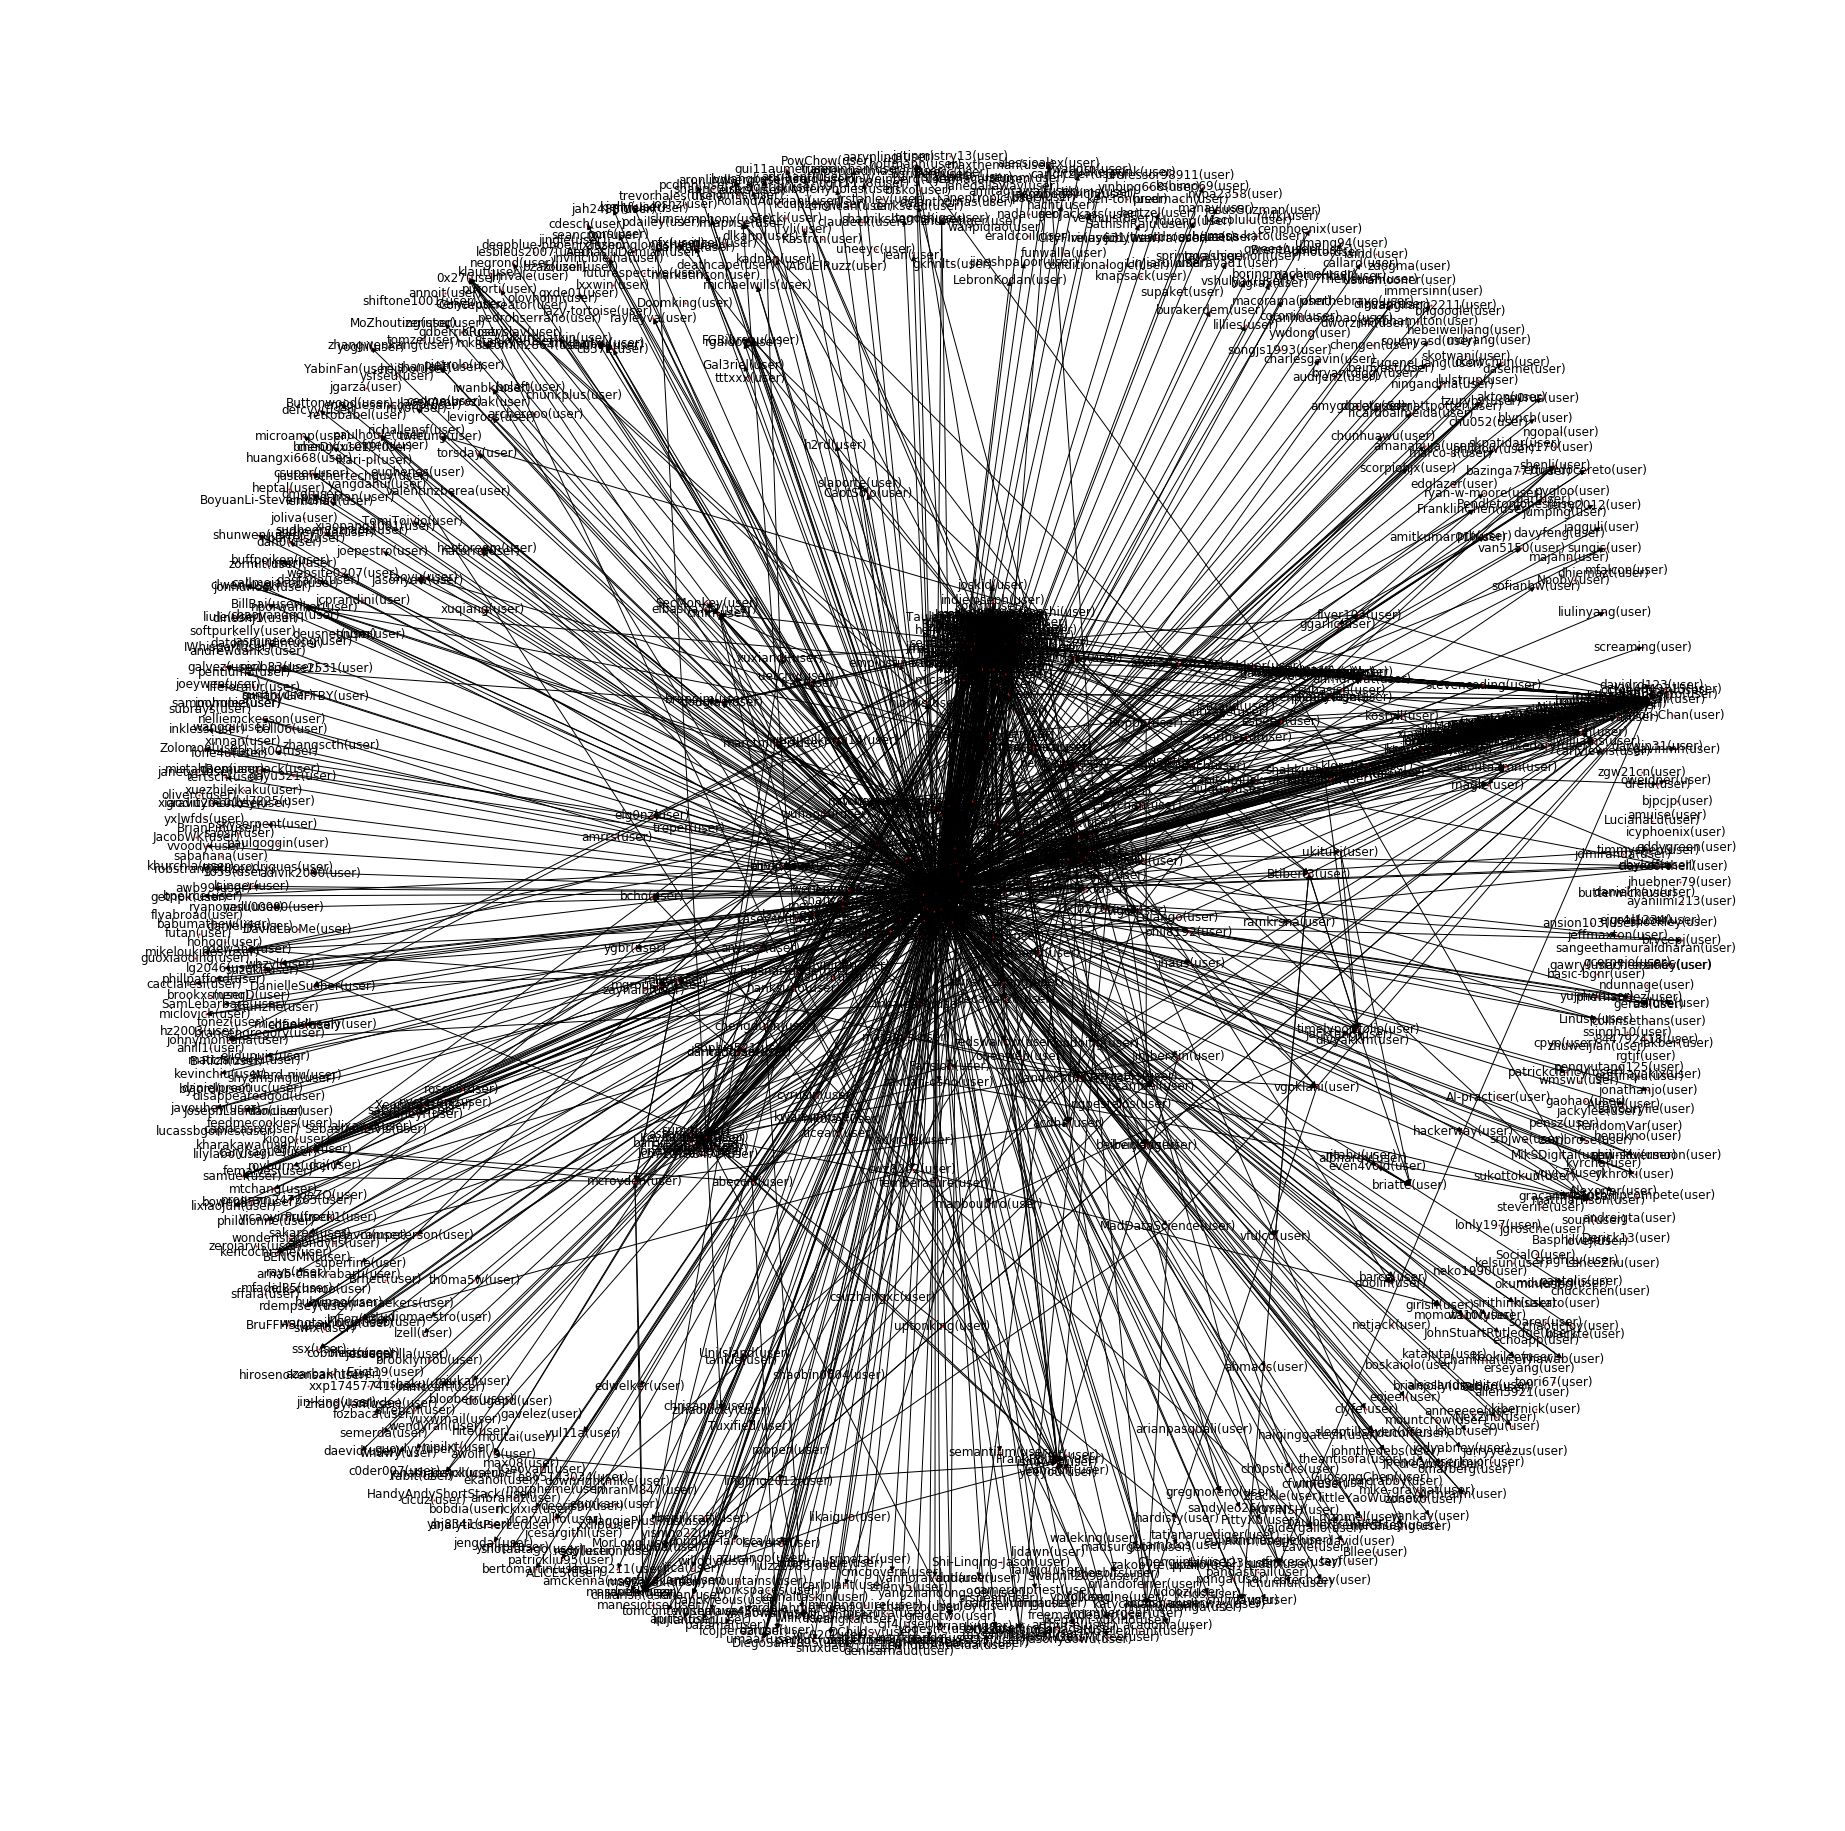

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
nx.draw(h, with_labels=True, node_size=1)
plt.show()